## Filtering methods

# Constant removal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('santander-train.csv')
test_data = pd.read_csv('santander-test.csv')
test_data.head

<bound method NDFrame.head of            ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           2     2     32                 0.0                      0.0   
1           5     2     35                 0.0                      0.0   
2           6     2     23                 0.0                      0.0   
3           7     2     24                 0.0                      0.0   
4           9     2     23                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
75813  151831     2     23                 0.0                      0.0   
75814  151832     2     26                 0.0                      0.0   
75815  151833     2     24                 0.0                      0.0   
75816  151834     2     40                 0.0                      0.0   
75817  151837     2     23                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0         

In [5]:
X = train_data.drop('TARGET', axis = 1)
y = train_data['TARGET']

X.shape,y.shape

((76020, 370), (76020,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

## Constant feature removal

In [7]:
# This is removing all the low variance features 
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
# Tells us the number of features remaining 
constant_filter.get_support().sum()

334

In [9]:
# to print the removed constant features
# returns true for all the features that are constant
const_list = [not temp for temp in constant_filter.get_support()]

# to print them out

X.columns[const_list]


Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var17_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [10]:
# to remove the identified constant features you use the transform method

X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [16]:
quasi_constant = VarianceThreshold(threshold = 0.01)


In [18]:
quasi_constant.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [22]:
quasi_constant.get_support().sum()

274

In [24]:
# Transforming the train and test dataset
X_train_quasi_filter = quasi_constant.transform(X_train_filter)
X_test_quasi_filter = quasi_constant.transform(X_test_filter)

In [26]:
# Transposing the two datasets
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [28]:
type(X_train_T)

numpy.ndarray

In [29]:
# converting to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [30]:
X_train_T.shape,X_test_T.shape

((274, 60816), (274, 15204))

In [34]:
# check for duplicates
X_train_T.duplicated().sum()

17

In [42]:
# returns booleans of true for duplicated and false otherwise
duplicated_features = X_train_T.duplicated()

In [43]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Length: 274, dtype: bool

In [44]:
# changing the falses into true
features_to_keep = [not index for index in duplicated_features]

In [45]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [46]:
X_train_unique.shape,X_test_unique.shape

((60816, 257), (15204, 257))

### Building the ML Model

In [49]:
def run_randomForest(X_train,X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [51]:
run_randomForest(X_train_unique,X_test_unique,y_train,y_test ) 

Accuracy on test set: 
0.9577742699289661


In [52]:
corrmat = X_train_unique.corr()

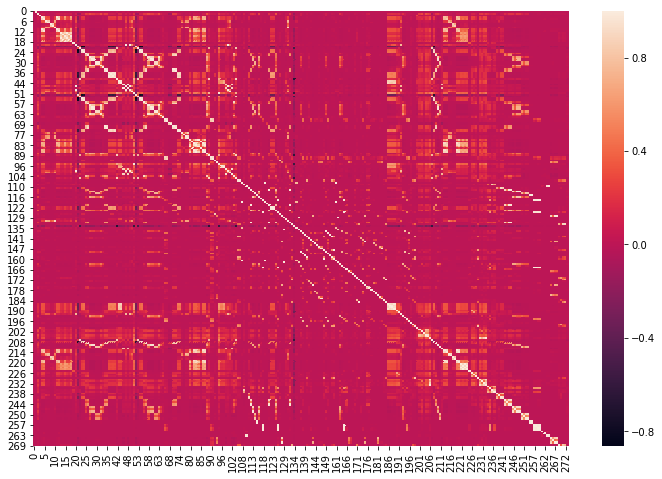

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)
# features that intercept on Black are very heavily unrelated and vice versa

In [55]:
# calculating the overall correlation

def get_correlation(data,threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [56]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 44,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 67,
 69,
 70,
 71,
 72,
 74,
 79,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 95,
 97,
 99,
 100,
 101,
 102,
 104,
 105,
 107,
 119,
 121,
 123,
 126,
 131,
 132,
 136,
 149,
 150,
 151,
 152,
 160,
 161,
 162,
 165,
 175,
 183,
 185,
 186,
 187,
 188,
 189,
 205,
 207,
 208,
 209,
 210,
 213,
 214,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 230,
 232,
 233,
 240,
 241,
 242,
 244,
 245,
 246,
 248,
 249,
 252,
 253,
 254,
 256,
 257,
 258,
 259,
 260,
 263,
 264,
 265,
 267,
 268,
 271,
 272}

In [58]:
len(corr_features)

123

In [60]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis = 1)

In [62]:
X_train_uncorr.shape,X_test_uncorr.shape

((60816, 134), (15204, 134))

In [64]:
%%time
run_randomForest(X_train_uncorr,X_test_uncorr,y_train,y_test)

Accuracy on test set: 
0.9575111812680873
Wall time: 19.1 s


## Grouping of correlated features

In [66]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,1.000000,1.729007e-03,-0.000254,-0.005682,-0.000346,-0.003110,-0.004019,-0.004011,-0.009194,-0.008626,...,-0.006925,0.002045,0.003100,-0.001107,-0.000835,-0.004486,-0.003159,-0.002534,-0.001901,-4.976133e-03
1,0.001729,1.000000e+00,-0.003901,0.002008,0.007571,0.008096,0.001427,0.001558,0.000463,0.000556,...,0.000205,0.000697,0.000467,0.000603,0.000638,0.000599,0.000502,0.000715,0.000756,-3.416077e-07
2,-0.000254,-3.900684e-03,1.000000,0.041196,0.091779,0.098097,0.039825,0.043382,0.007651,0.008741,...,0.011865,0.029886,0.016513,0.028826,0.029562,0.031825,0.019675,0.034699,0.035776,3.708910e-03
3,-0.005682,2.007748e-03,0.041196,1.000000,0.040702,0.035257,0.004600,0.006684,0.000748,0.002858,...,0.009027,-0.000910,-0.000614,-0.000628,-0.000606,-0.000500,-0.000606,-0.000705,-0.000722,1.720111e-04
4,-0.000346,7.570815e-03,0.091779,0.040702,1.000000,0.887059,0.330151,0.283619,0.026883,0.053966,...,0.001779,0.018046,0.013414,0.013068,0.014324,0.011142,0.006080,0.011130,0.009281,1.168986e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.004486,5.992592e-04,0.031825,-0.000500,0.011142,0.010006,-0.000374,-0.000500,-0.000188,-0.000226,...,-0.000084,0.001305,-0.000182,0.003800,0.003329,1.000000,0.315712,0.838027,0.740674,3.712808e-03
270,-0.003159,5.017307e-04,0.019675,-0.000606,0.006080,0.007069,-0.000471,-0.000509,-0.000154,-0.000185,...,-0.000069,-0.000221,-0.000149,-0.000191,-0.000202,0.315712,1.000000,0.227625,0.217167,4.181776e-03
271,-0.002534,7.147679e-04,0.034699,-0.000705,0.011130,0.009531,-0.000108,-0.000392,-0.000226,-0.000271,...,-0.000101,0.000934,-0.000218,0.002940,0.002559,0.838027,0.227625,1.000000,0.970078,4.603756e-03
272,-0.001901,7.555793e-04,0.035776,-0.000722,0.009281,0.007489,-0.000229,-0.000485,-0.000239,-0.000287,...,-0.000106,0.001157,-0.000230,0.003543,0.003090,0.740674,0.217167,0.970078,1.000000,4.684484e-03


In [69]:
# a simplified view of the corrmatrix in absolute values
corr_data = corrmat.abs().stack()
corr_data

0    0      1.000000
     1      0.001729
     2      0.000254
     3      0.005682
     4      0.000346
              ...   
273  269    0.003713
     270    0.004182
     271    0.004604
     272    0.004684
     273    1.000000
Length: 66049, dtype: float64

In [72]:
corr_data = corr_data.sort_values(ascending = False)
corr_data

254  256    1.000000e+00
256  254    1.000000e+00
24   55     1.000000e+00
55   24     1.000000e+00
138  150    1.000000e+00
                ...     
243  253    1.536049e-07
172  24     1.068761e-07
24   172    1.068761e-07
55   172    1.068761e-07
172  55     1.068761e-07
Length: 66049, dtype: float64

In [74]:
# grouping the correlated 

corr_data = corr_data[corr_data>0.85]
corr_data = corr_data[corr_data< 1]
corr_data

140  152    1.000000
152  140    1.000000
160  148    1.000000
148  160    1.000000
137  149    1.000000
              ...   
188  43     0.851146
111  241    0.850602
241  111    0.850602
218  217    0.850287
217  218    0.850287
Length: 516, dtype: float64

In [76]:
corrdata = pd.DataFrame(corr_data).reset_index()
corrdata.columns = ['Features1', 'Features2','Value']
corrdata

,Features1,Features2,Value
0,140,152,1.000000
1,152,140,1.000000
2,160,148,1.000000
3,148,160,1.000000
4,137,149,1.000000
...,...,...,...
511,188,43,0.851146
512,111,241,0.850602
513,241,111,0.850602
514,218,217,0.850287


In [81]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1 ==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique())+[feature]
        correlated_groups_list.append(correlated_block)

In [83]:
# out of the correlated features there are 56 groups
len(correlated_groups_list)

57

In [84]:
for group in correlated_groups_list:
    print(group)

   Features1  Features2  Value
0        140        152    1.0
   Features1  Features2  Value
2        160        148    1.0
   Features1  Features2  Value
4        137        149    1.0
   Features1  Features2  Value
6        256        115    1.0
   Features1  Features2  Value
8        254        115    1.0
    Features1  Features2  Value
10        183        147    1.0
    Features1  Features2  Value
12        175        143    1.0
    Features1  Features2     Value
14        119        108  0.999877
16        119        161  0.999805
     Features1  Features2     Value
18          23         54  0.999739
252         23         55  0.932170
255         23         24  0.932170
450         23        208  0.868936
473         23         21  0.861805
     Features1  Features2     Value
22          60         29  0.999590
120         60         28  0.983309
146         60         59  0.977587
198         60        210  0.956832
369         60         32  0.897546
399         60         27

### feature importance based on tree based classifiers

In [87]:
# we will use this to select the best performing features based on the classifiers

important_features = []
for group in correlated_groups_list:
    features = list(group.Features1.unique()) +list(group.Features2.unique())
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
    rf.fit(X_train_unique[features],y_train)
    
    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [89]:
important_features 

[features      140.000000
 importance      0.549083
 Name: 0, dtype: float64, features      148.000000
 importance      0.505979
 Name: 1, dtype: float64, features      137.000000
 importance      0.506065
 Name: 0, dtype: float64, features      256.000000
 importance      0.514706
 Name: 0, dtype: float64, features      254.000000
 importance      0.514706
 Name: 0, dtype: float64, features      183.0
 importance      0.5
 Name: 0, dtype: float64, features      143.000000
 importance      0.545455
 Name: 1, dtype: float64, features      108.000000
 importance      0.998703
 Name: 1, dtype: float64, features      54.000000
 importance     0.302435
 Name: 1, dtype: float64, features      27.000000
 importance     0.315714
 Name: 6, dtype: float64, features      209.000000
 importance      0.436237
 Name: 6, dtype: float64, features      100.00000
 importance      0.48806
 Name: 1, dtype: float64, features      14.000000
 importance     0.505961
 Name: 0, dtype: float64, features      22

In [91]:
important_features = pd.DataFrame(important_features)

In [92]:
important_features.reset_index(inplace=True, drop = True)

In [93]:
important_features

,features,importance
0,140.0,0.549083
1,148.0,0.505979
2,137.0,0.506065
3,256.0,0.514706
4,254.0,0.514706
5,183.0,0.500000
6,143.0,0.545455
7,108.0,0.998703
8,54.0,0.302435
9,27.0,0.315714


In [94]:
# Getting features we want to drop

features_to_consider = set(important_features['features'])
features_to_discard = set(corr_features) - set(features_to_consider)

In [95]:
features_to_discard = list(features_to_discard)

In [100]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis =1)
X_test_grouped_uncorr = X_test_unique.drop(labels = features_to_discard, axis =1)
X_train_grouped_uncorr.shape,X_test_grouped_uncorr.shape

((60816, 168), (15204, 168))

In [99]:
%%time 
run_randomForest(X_train_grouped_uncorr,X_test_grouped_uncorr,y_train,y_test)

Accuracy on test set: 
0.9580373585898447
Wall time: 20.1 s


## Feature selection with mutual information Gain